In [1]:
import os
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'
# Image dimensions
img_width, img_height = 224, 224  # MobileNet requires input size of 224x224
batch_size = 32
num_epochs = 20

In [3]:
# Load model for feature extraction
model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input for MobileNet
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features for training set
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features.flatten())
        y_train.append(i)

1/1 [==============================] - 0s 60ms/step


In [6]:
# Load images and extract features for test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features.flatten())
        y_test.append(i)

1/1 [==============================] - 0s 59ms/step


In [7]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
# Predict on test set
y_pred = clf.predict(x_test)

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[23 15  7  2 13]
 [ 9 32 13  0  6]
 [17 21 14  3  5]
 [10  1  3 32 14]
 [ 8  5  7  9 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        60
           1       0.43      0.53      0.48        60
           2       0.32      0.23      0.27        60
           3       0.70      0.53      0.60        60
           4       0.45      0.52      0.48        60

    accuracy                           0.44       300
   macro avg       0.45      0.44      0.44       300
weighted avg       0.45      0.44      0.44       300




Accuracy: 0.44
Precision: 0.44776507378713737
Recall: 0.44
F1 Score: 0.43868823477662916


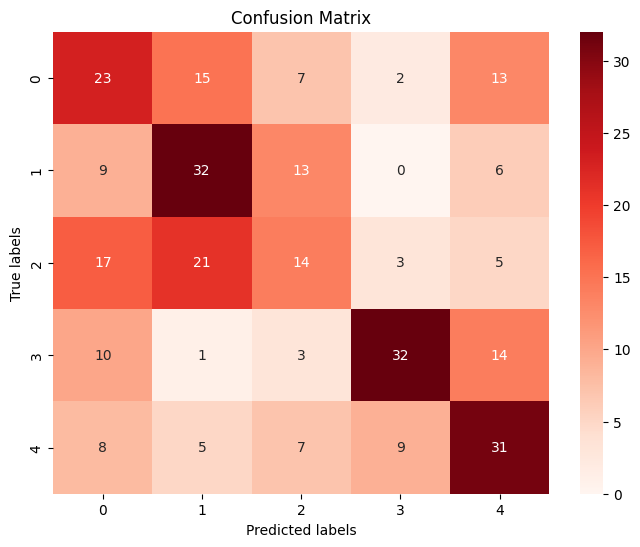

In [10]:
# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()